In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
education_file_paths = ['./csv/education/australia.csv', './csv/education/finland.csv', './csv/education/france.csv',
              './csv/education/italy.csv', './csv/education/japan.csv', './csv/education/korea.csv',
              './csv/education/netherlands.csv', './csv/education/poland.csv', './csv/education/singapore.csv',
              './csv/education/switerland.csv']

health_file_paths = ['./csv/health/canada.csv', './csv/health/finland.csv', './csv/health/france.csv',
              './csv/health/germany.csv', './csv/health/italy.csv', './csv/health/japan.csv',
              './csv/health/poland.csv', './csv/health/sweden.csv']

In [3]:
def read_and_transform_csv(education_file_paths):
    list_of_dataframes = {}
    for path in education_file_paths:
        name = path.split('/')[-1].split('.')[0]
        df = pd.read_csv(path)

        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Value'].fillna(0, inplace=True)
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
        df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        list_of_dataframes[name] = df
    return list_of_dataframes

lista = read_and_transform_csv(education_file_paths)

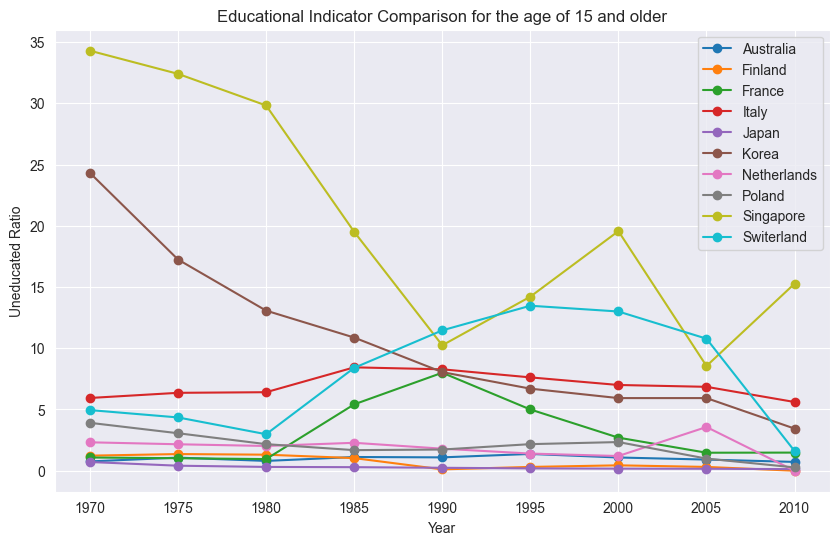

In [4]:

countries = ['australia', 'finland', 'france', 'italy', 'japan', 'korea', 'netherlands', 'poland', 'singapore', 'switerland']

age_and_gender_groups = ['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS','BAR.NOED.15UP.FE.ZS', 'BAR.NOED.15UP.ZS',
              'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
              'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS', 'BAR.NOED.25UP.ZS',
              'BAR.NOED.3034.FE.ZS', 'BAR.NOED.3034.ZS',
              'BAR.NOED.3539.FE.ZS', 'BAR.NOED.3539.ZS',
              'BAR.NOED.4044.FE.ZS', 'BAR.NOED.4044.ZS',
              'BAR.NOED.4549.FE.ZS', 'BAR.NOED.4549.ZS',
              'BAR.NOED.5054.FE.ZS', 'BAR.NOED.5054.ZS',
              'BAR.NOED.5559.FE.ZS', 'BAR.NOED.5559.ZS',
              'BAR.NOED.6064.FE.ZS', 'BAR.NOED.6064.ZS']

indicator_code = 'BAR.NOED.15UP.ZS'

plt.figure(figsize=(10, 6))


for country in countries:
    df_country = lista[country]
    df_indicator = df_country[df_country['Indicator Code'] == indicator_code]

    plt.plot(df_indicator['Year'], df_indicator['Value'], marker='o', label=country.capitalize())


plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison for the age of 15 and older')
plt.legend()
plt.grid(True)
plt.show()

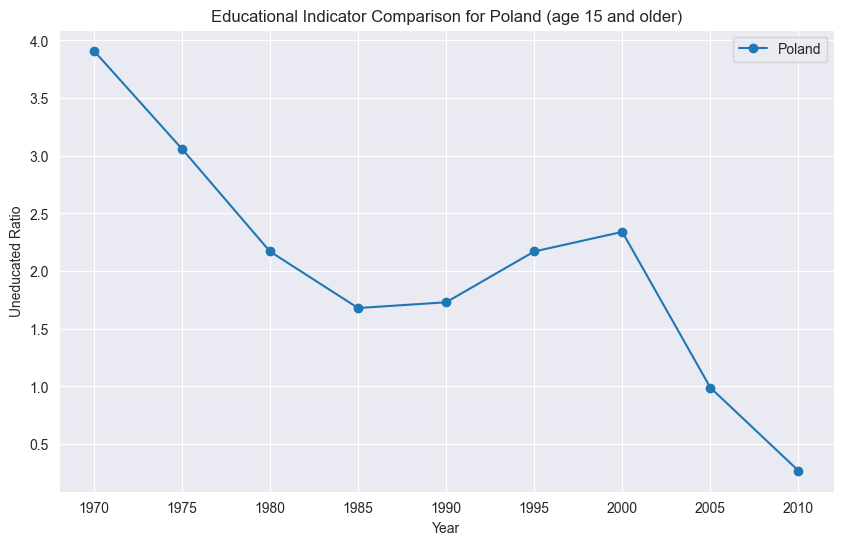

In [5]:
selected_country = 'poland'
df_poland = lista[selected_country]

df_poland_indicator = df_poland[df_poland['Indicator Code'] == indicator_code]

plt.figure(figsize=(10, 6))
plt.plot(df_poland_indicator['Year'], df_poland_indicator['Value'], marker='o', label='Poland')

plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison for {selected_country.capitalize()} (age 15 and older)')
plt.legend()
plt.grid(True)
plt.show()

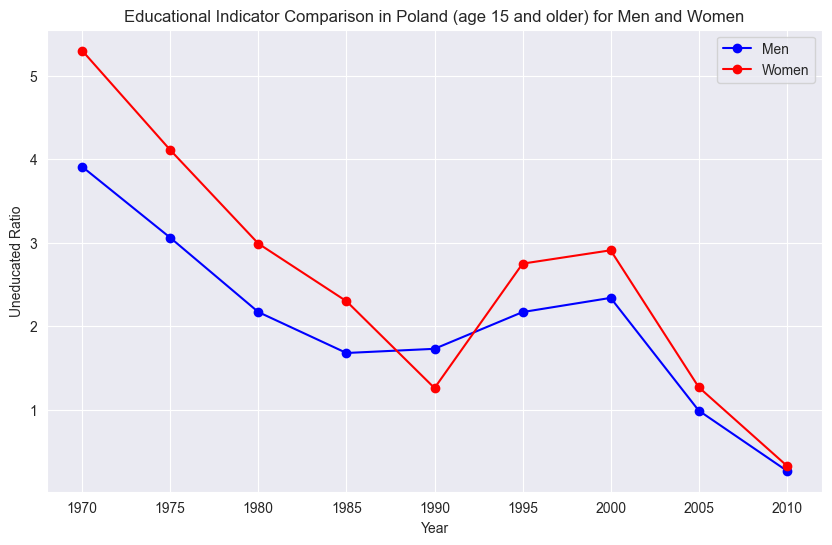

In [6]:
indicator_code_men = 'BAR.NOED.15UP.ZS'
indicator_code_women = 'BAR.NOED.15UP.FE.ZS'

df_poland_men = df_poland[df_poland['Indicator Code'] == indicator_code_men]
df_poland_women = df_poland[df_poland['Indicator Code'] == indicator_code_women]

plt.figure(figsize=(10, 6))
plt.plot(df_poland_men['Year'], df_poland_men['Value'], marker='o', label='Men', color='b')
plt.plot(df_poland_women['Year'], df_poland_women['Value'], marker='o', label='Women', color='r')

plt.xlabel('Year')
plt.ylabel('Uneducated Ratio')
plt.title(f'Educational Indicator Comparison in Poland (age 15 and older) for Men and Women')
plt.legend()
plt.grid(True)
plt.show()


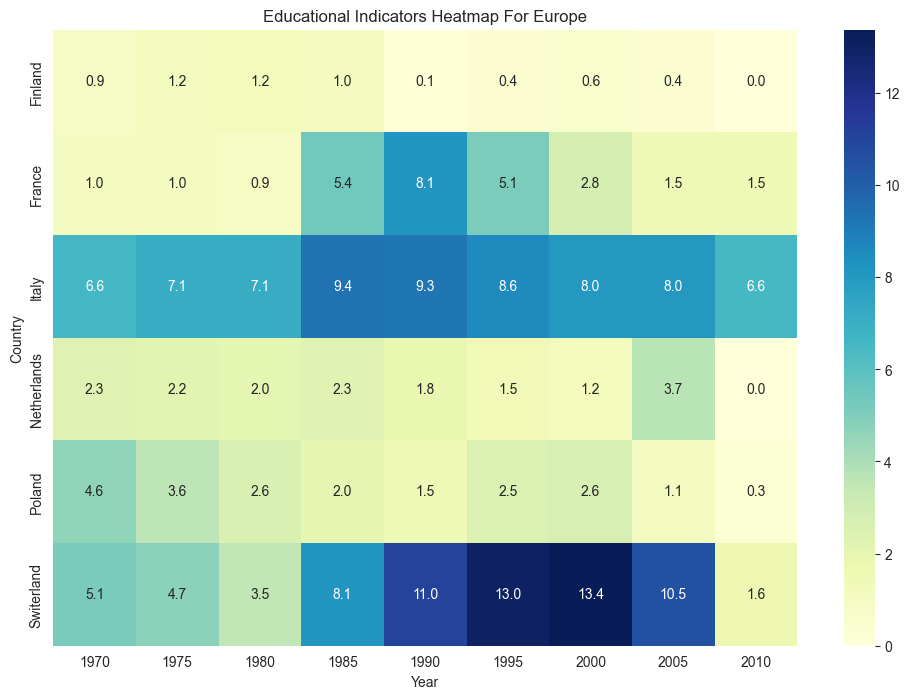

In [7]:
selected_countries = ['poland', 'italy', 'france', 'switerland', 'finland', 'netherlands']
selected_indicators = ['BAR.NOED.15UP.ZS', 'BAR.NOED.15UP.FE.ZS', 'BAR.NOED.15UP.MA.ZS']

data = []

for country in selected_countries:
    for indicator_code in selected_indicators:
        df_country_indicator = lista[country][lista[country]['Indicator Code'] == indicator_code]
        data.extend(list(zip(df_country_indicator['Year'].dt.year, [country.capitalize()] * len(df_country_indicator), df_country_indicator['Value'], [indicator_code] * len(df_country_indicator))))

df_heatmap = pd.DataFrame(data, columns=['Year', 'Country', 'Value', 'Indicator Code'])

plt.figure(figsize=(12, 8))
heatmap_data = df_heatmap.pivot_table(index='Country', columns='Year', values='Value', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Educational Indicators Heatmap For Europe')
plt.show()

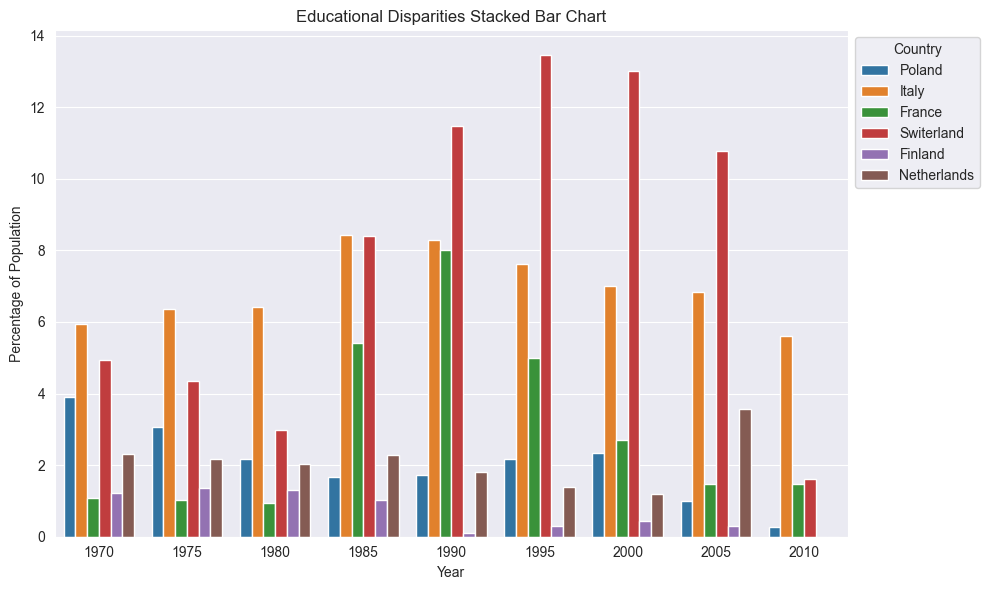

In [17]:
selected_countries = ['poland', 'italy', 'france', 'switerland', 'finland', 'netherlands']
selected_indicators = ['BAR.NOED.15UP.ZS', 'BAR.NOED.15UP.FE.ZS']

data = []

for country in selected_countries:
    for indicator_code in selected_indicators:
        df_country_indicator = lista[country][lista[country]['Indicator Code'] == indicator_code]
        data.extend(list(zip(df_country_indicator['Year'].dt.year, [country.capitalize()] * len(df_country_indicator), df_country_indicator['Value'], [indicator_code] * len(df_country_indicator))))

df_stacked_bar_data = pd.DataFrame(data, columns=['Year', 'Country', 'Value', 'Indicator Code'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Value', hue='Country', data=df_stacked_bar_data, estimator=sum, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Educational Disparities Stacked Bar Chart')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
